In [100]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
column_info_list = []
for col in df.columns:
    name = col
    null_value = df[col].isnull().sum()
    nunique = df[col].nunique()
    sample = df[col].unique()[:5]
    data_type = df[col].dtype

    column_info_list.append({'Name': name, 'Null Value': null_value, 'Nunique': nunique, 'Sample': sample, 'Data Type': data_type})  # Corrected the colon placement

column_info = pd.DataFrame(column_info_list)

In [6]:
column_info

,Name,Null Value,Nunique,Sample,Data Type
0,Pregnancies,0,17,"[6, 1, 8, 0, 5]",int64
1,Glucose,0,136,"[148, 85, 183, 89, 137]",int64
2,BloodPressure,0,47,"[72, 66, 64, 40, 74]",int64
3,SkinThickness,0,51,"[35, 29, 0, 23, 32]",int64
4,Insulin,0,186,"[0, 94, 168, 88, 543]",int64
5,BMI,0,248,"[33.6, 26.6, 23.3, 28.1, 43.1]",float64
6,DiabetesPedigreeFunction,0,517,"[0.627, 0.351, 0.672, 0.167, 2.288]",float64
7,Age,0,52,"[50, 31, 32, 21, 33]",int64
8,Outcome,0,2,"[1, 0]",int64


## Train Test Split ##

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Pre-Process Data Training ##

In [9]:
y_train.value_counts()

0    401
1    213
Name: Outcome, dtype: int64

#### Handle target imbalance using SMOTE ####

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [11]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
y_train_resampled.value_counts()

0    401
1    401
Name: Outcome, dtype: int64

In [13]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               802 non-null    int64  
 1   Glucose                   802 non-null    int64  
 2   BloodPressure             802 non-null    int64  
 3   SkinThickness             802 non-null    int64  
 4   Insulin                   802 non-null    int64  
 5   BMI                       802 non-null    float64
 6   DiabetesPedigreeFunction  802 non-null    float64
 7   Age                       802 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


In [14]:
X_train_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,84,0,0,0,0.0,0.304,21
1,9,112,82,24,0,28.2,1.282,50
2,1,139,46,19,83,28.7,0.654,22
3,0,161,50,0,0,21.9,0.254,65
4,6,134,80,37,370,46.2,0.238,46


In [15]:
X_trainCat = X_train_resampled['Pregnancies']
X_trainNum = X_train_resampled.drop(columns=['Pregnancies'])

In [16]:
X_trainCat.value_counts()

1     131
0     110
2     102
3      79
4      69
5      67
6      63
7      52
8      41
9      36
10     23
11     11
13      7
12      6
15      2
14      2
17      1
Name: Pregnancies, dtype: int64

In [17]:
X_trainNum.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,84,0,0,0,0.0,0.304,21
1,112,82,24,0,28.2,1.282,50
2,139,46,19,83,28.7,0.654,22
3,161,50,0,0,21.9,0.254,65
4,134,80,37,370,46.2,0.238,46


## Check on Numerical Data Distribution ##

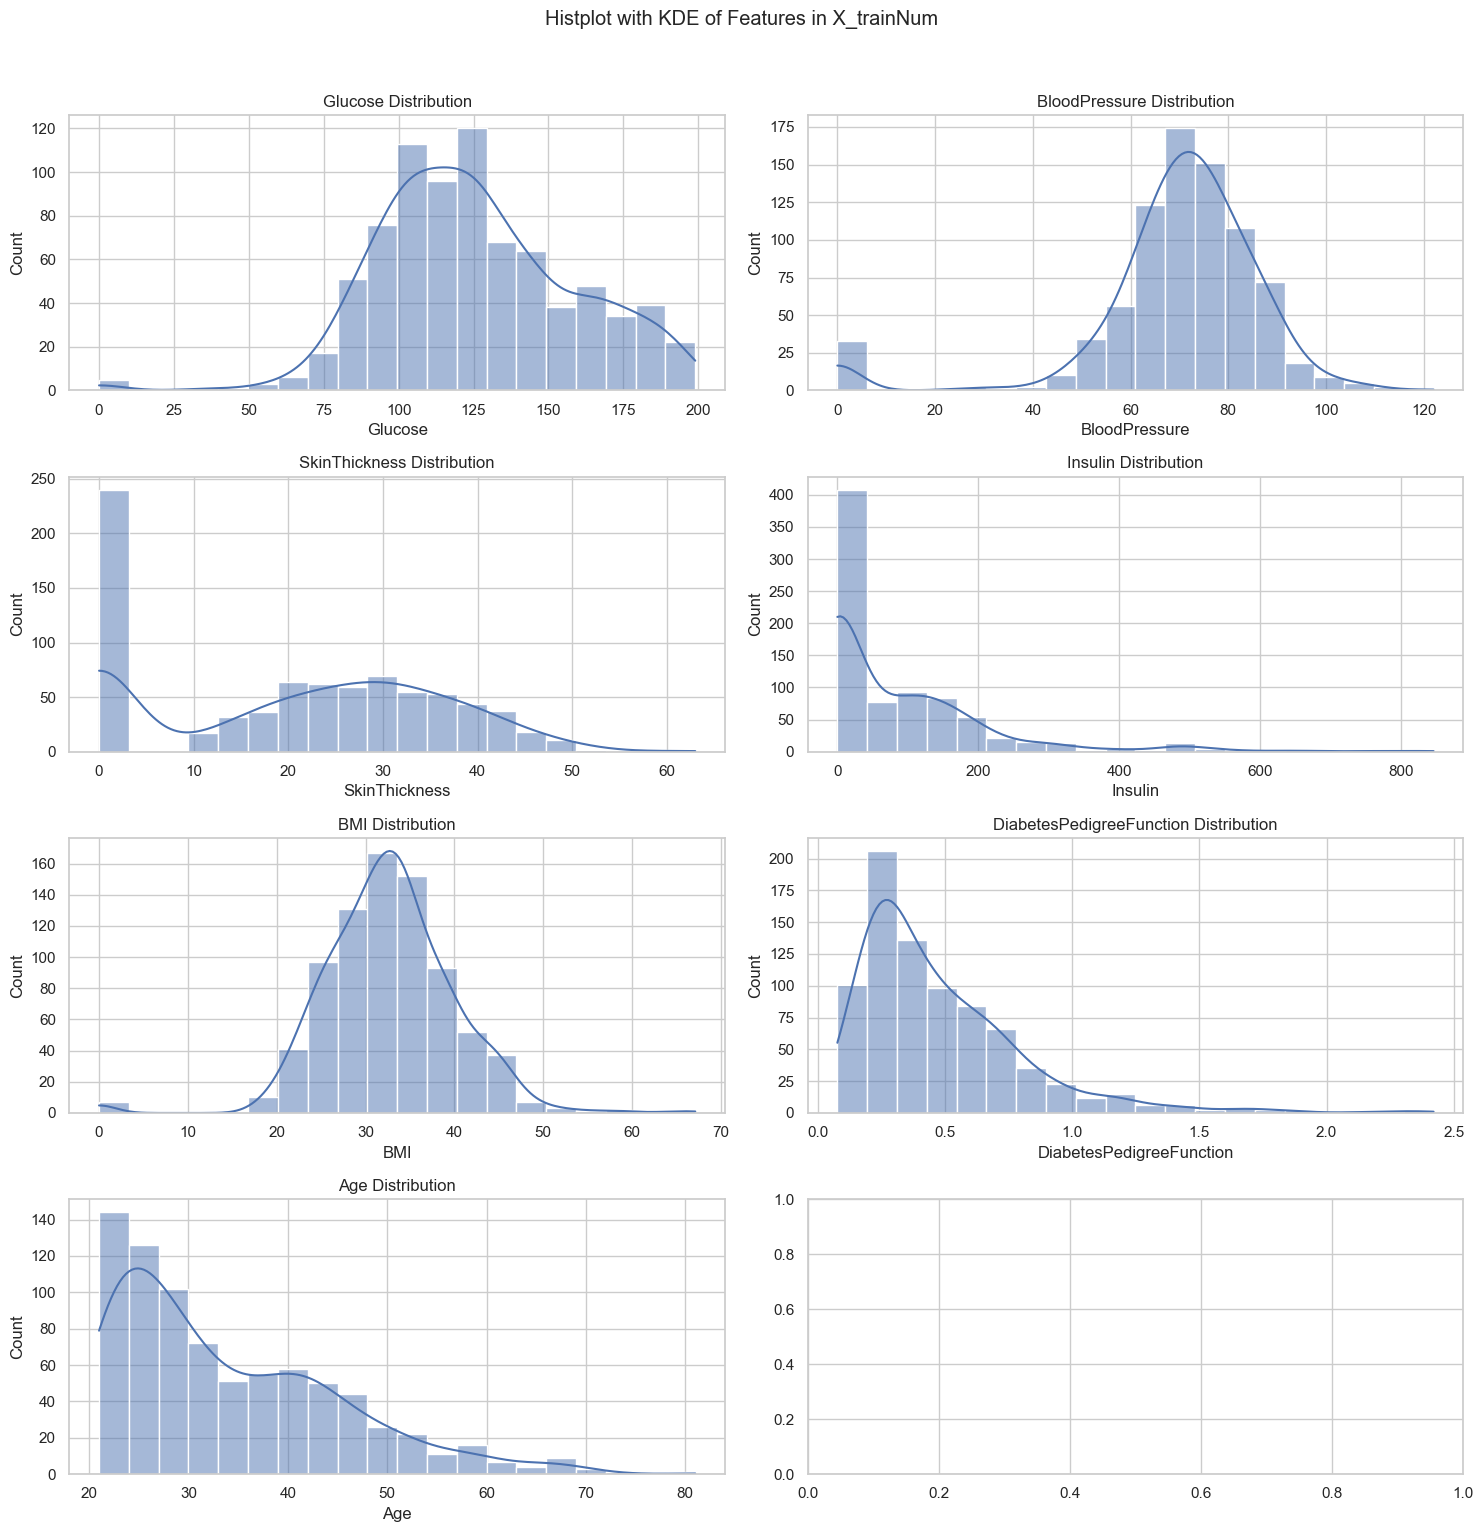

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.suptitle("Histplot with KDE of Features in X_trainNum", y=1.02)

axes = axes.flatten()

for i, column in enumerate(X_trainNum.columns):
    sns.histplot(X_trainNum[column], kde=True, bins=20, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

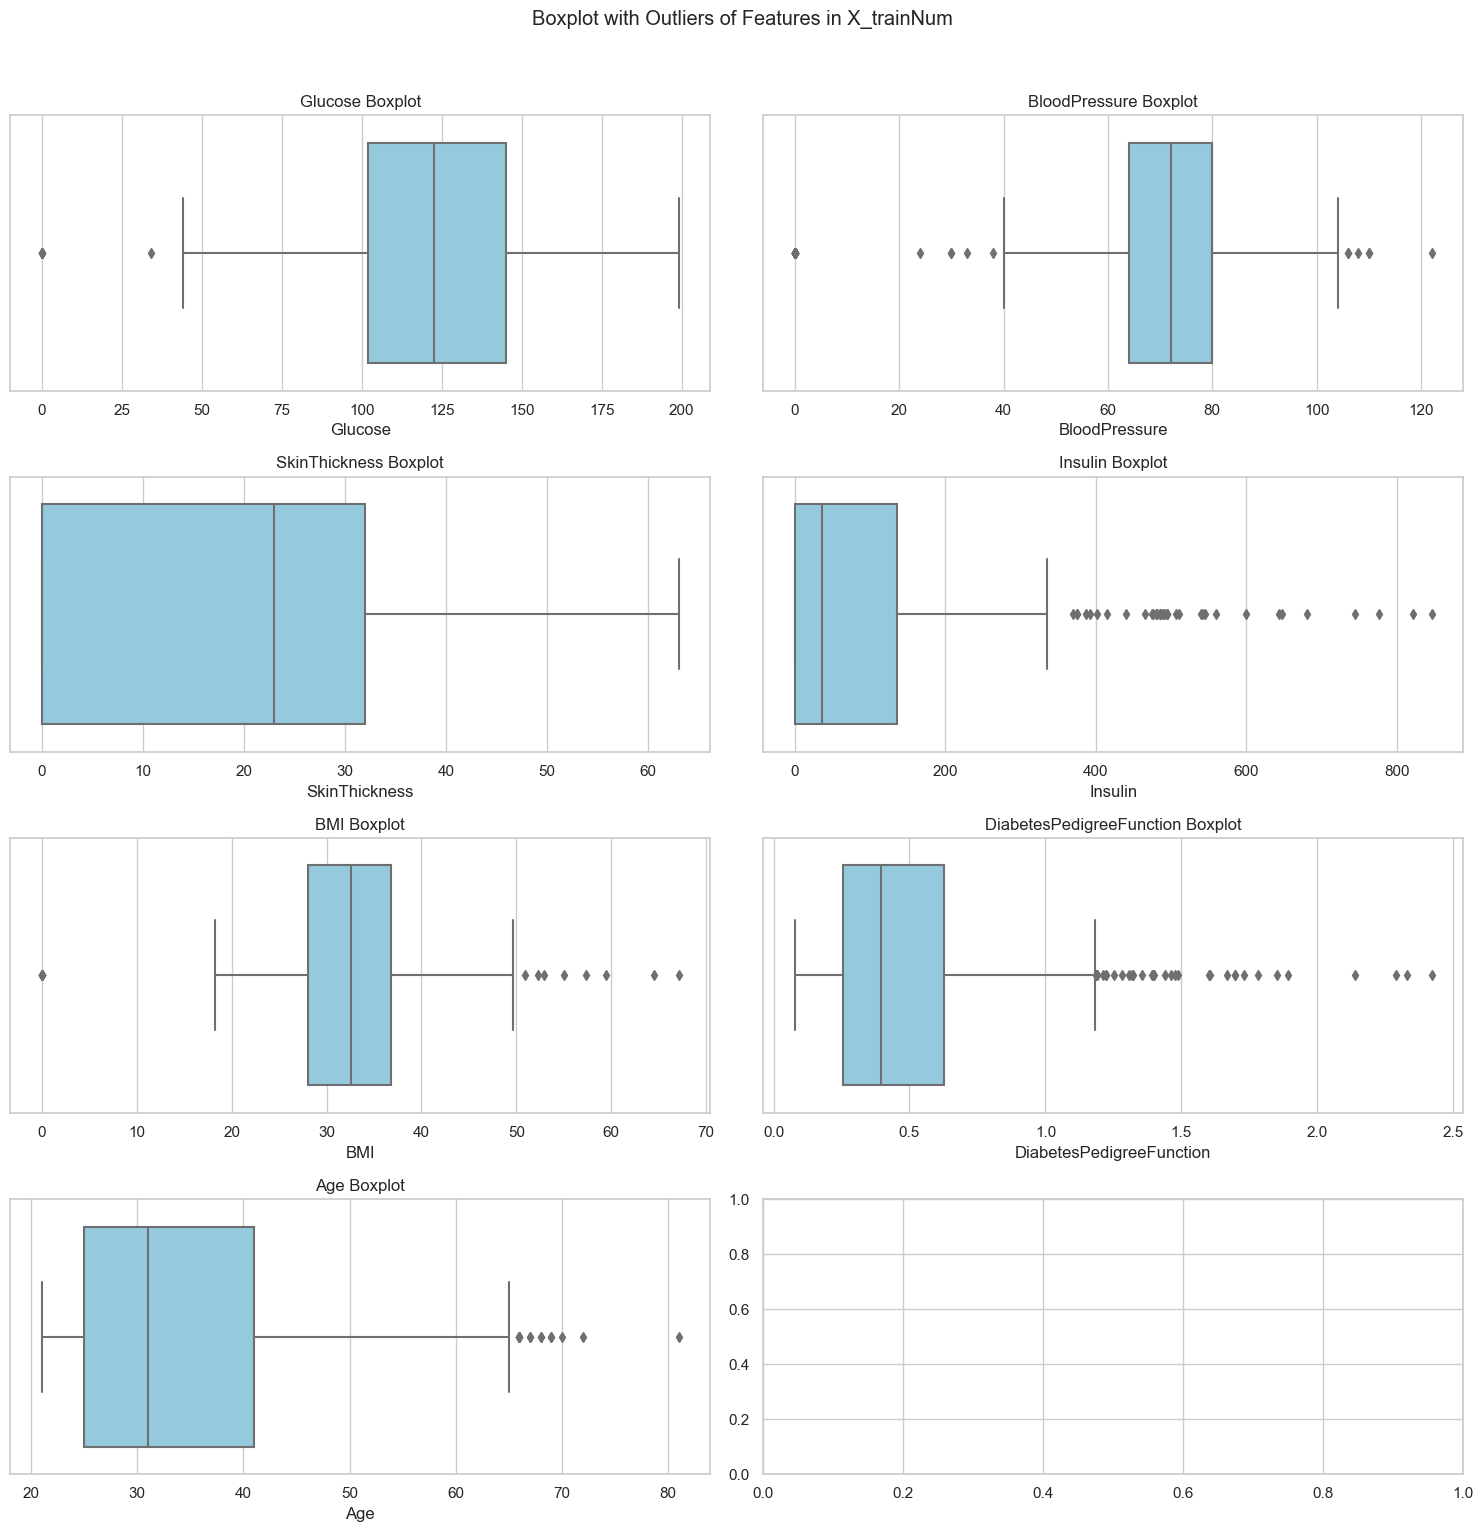

In [19]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.suptitle("Boxplot with Outliers of Features in X_trainNum", y=1.02)

axes = axes.flatten()

for i, column in enumerate(X_trainNum.columns):
    sns.boxplot(x=X_trainNum[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{column} Boxplot")

plt.tight_layout()
plt.show()

## Handle Outlier and Skewness for Numerical Feature ##

In [20]:
def handle_outliers_iqr(data, column, lower_factor=1.5, upper_factor=1.5):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - lower_factor * iqr
    upper_bound = q3 + upper_factor * iqr

    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

lower_factor = 1.5
upper_factor = 1.5

for column in X_trainNum.columns:
    handle_outliers_iqr(X_trainNum, column, lower_factor, upper_factor)

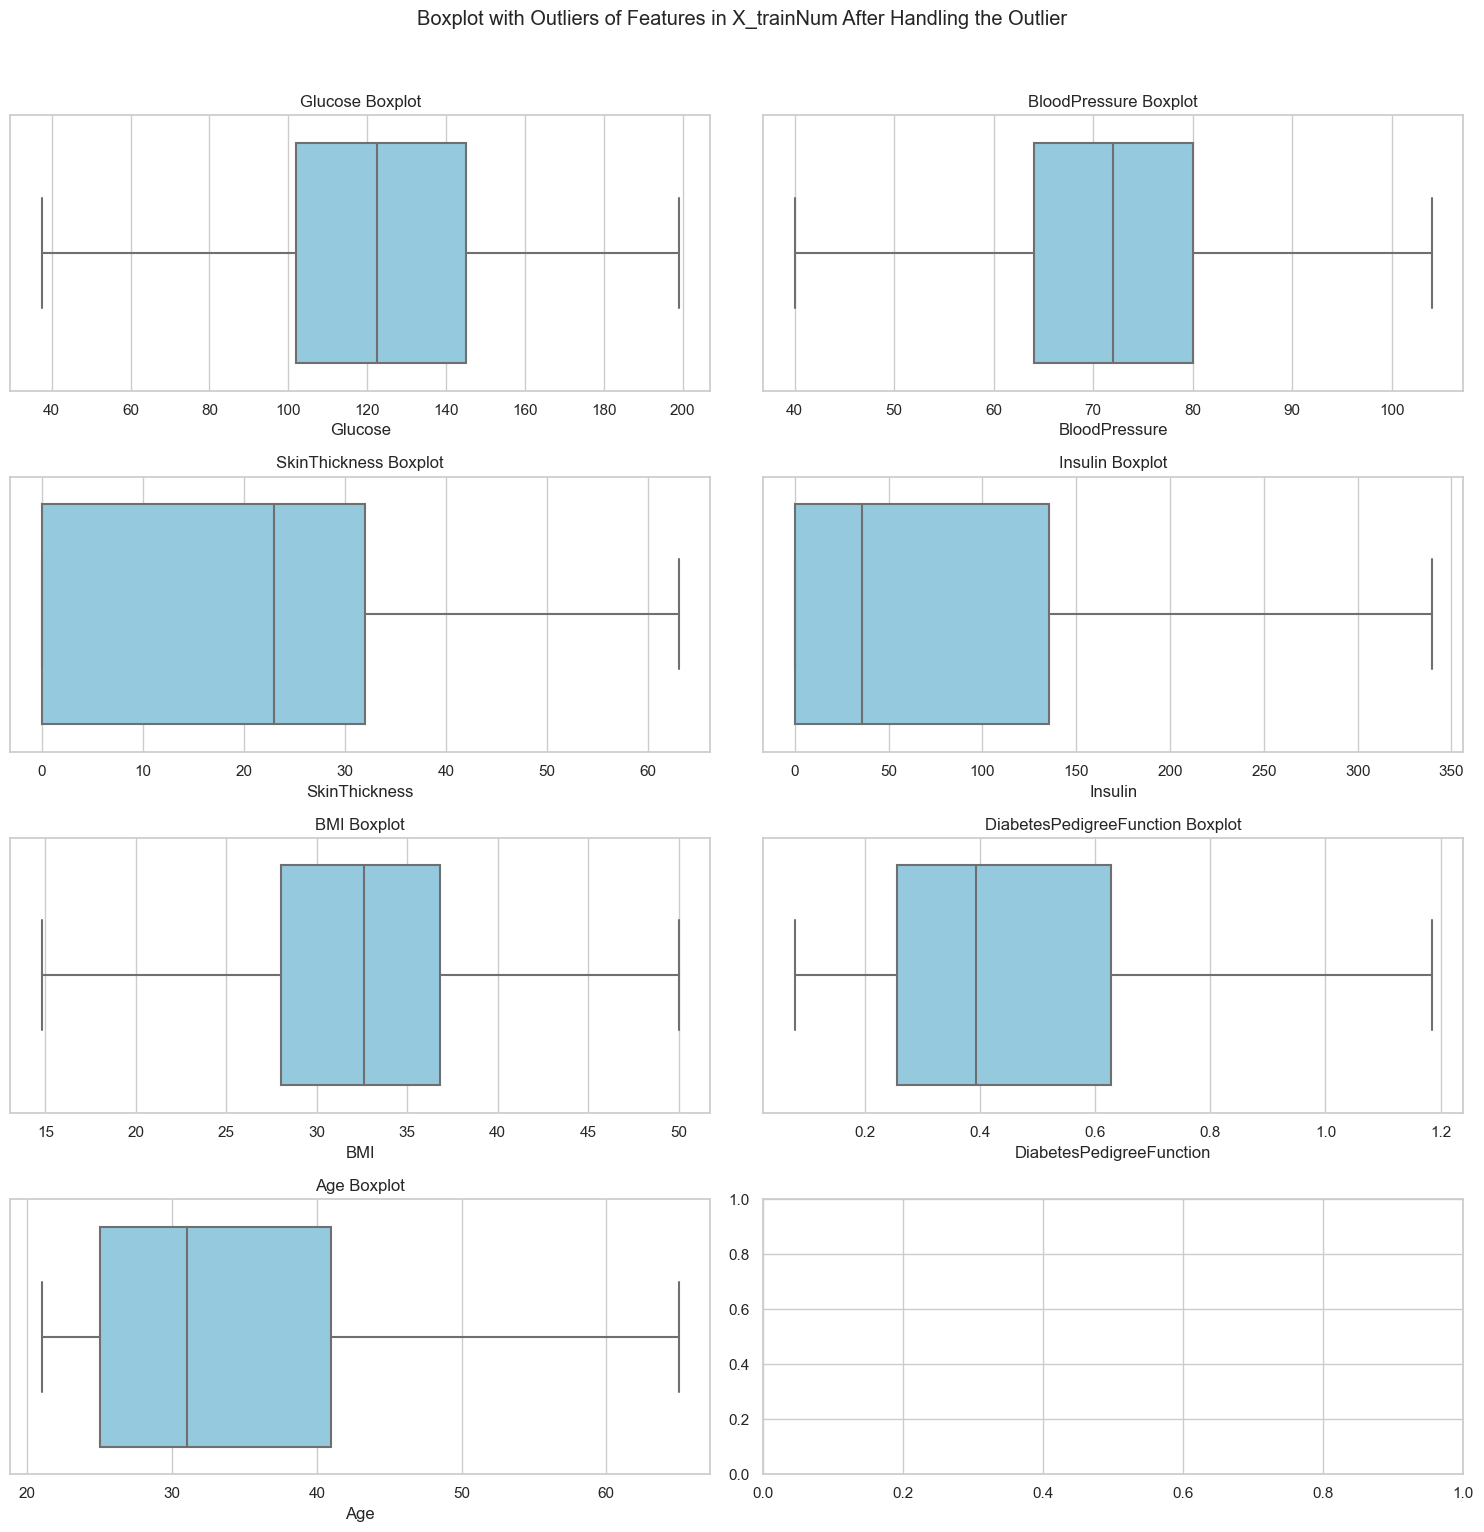

In [21]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.suptitle("Boxplot with Outliers of Features in X_trainNum After Handling the Outlier", y=1.02)

axes = axes.flatten()

for i, column in enumerate(X_trainNum.columns):
    sns.boxplot(x=X_trainNum[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{column} Boxplot")

plt.tight_layout()
plt.show()

#### Outlier Handled using IQR ####

In [22]:
from scipy.stats import boxcox
import pandas as pd

def handle_skewness_boxcox(data):
    for column in data.columns:
        data[column] = boxcox(data[column] + 1)[0]

handle_skewness_boxcox(X_trainNum)

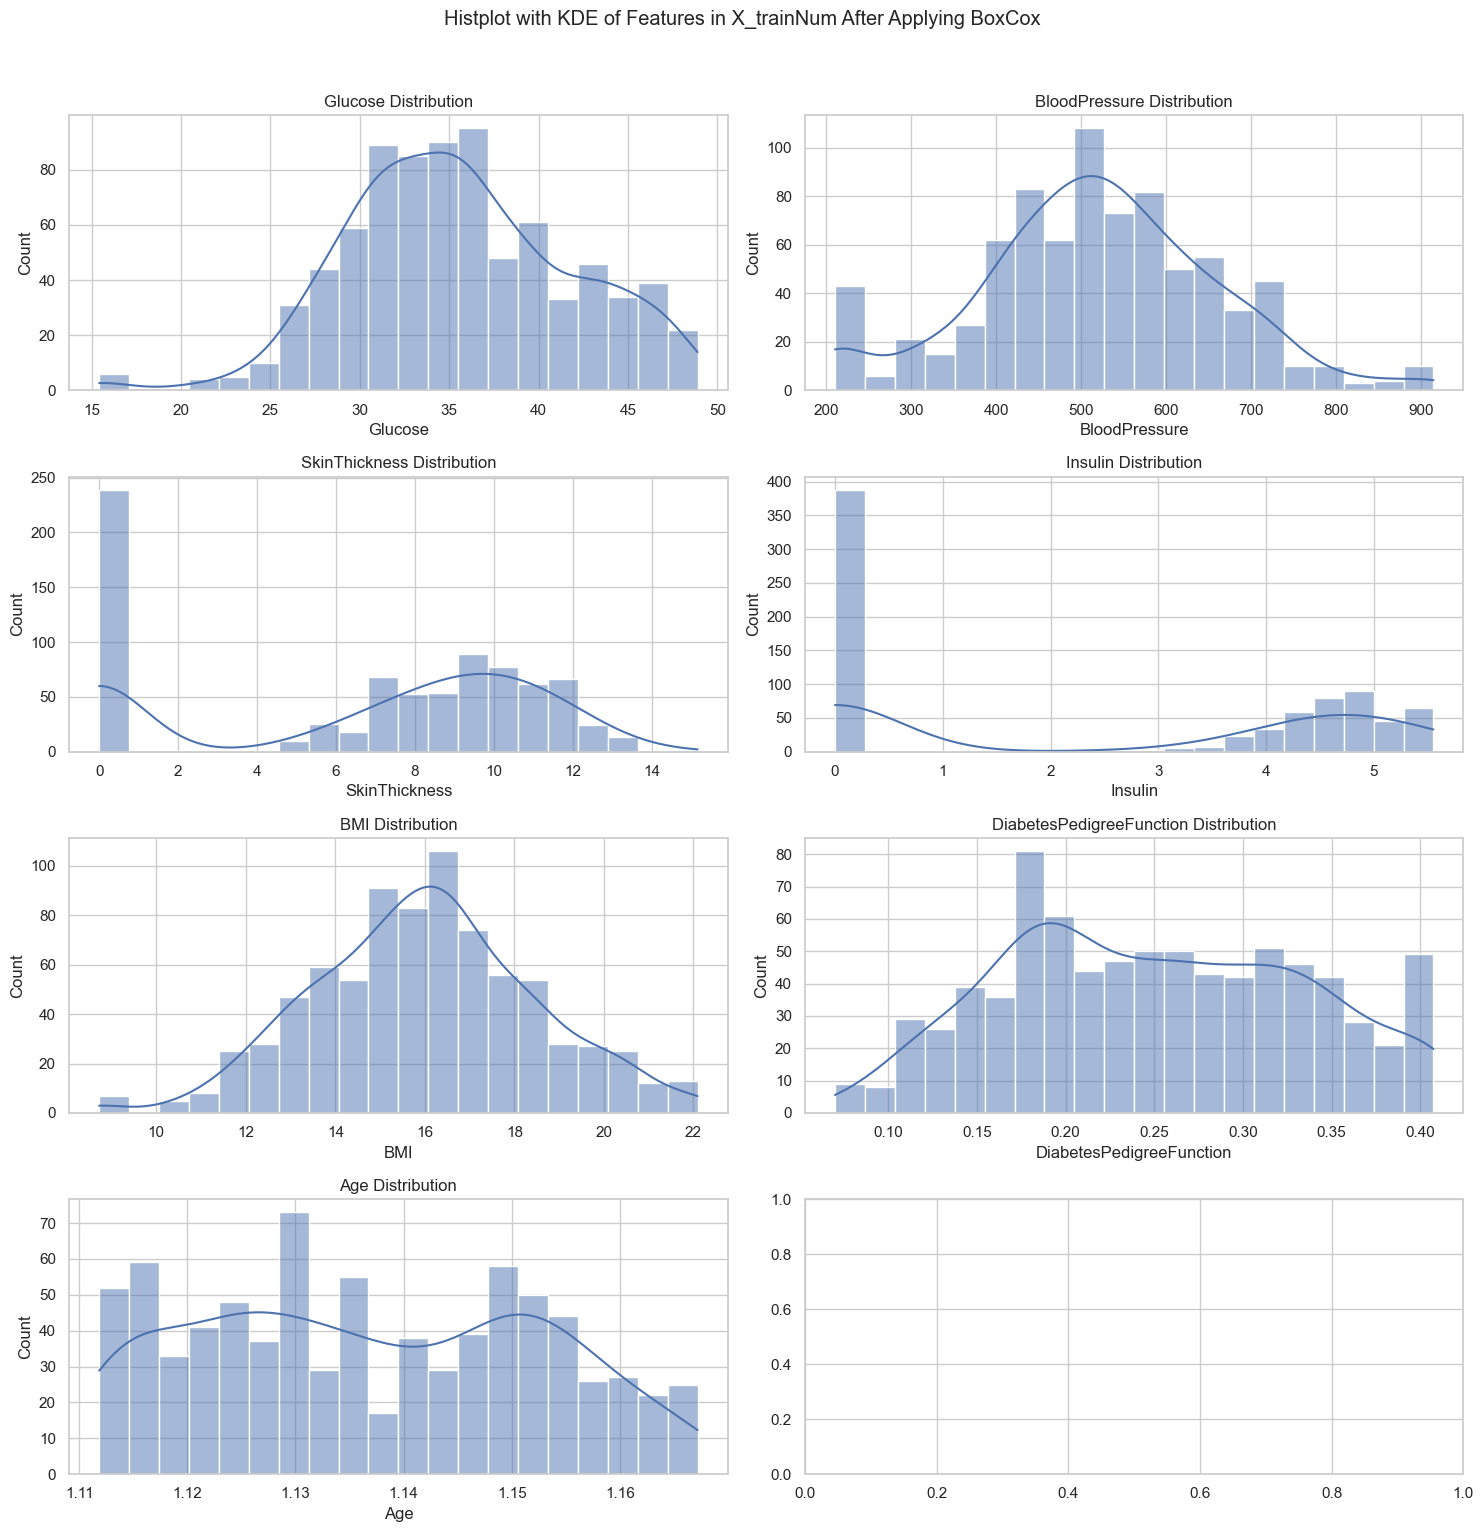

In [23]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.suptitle("Histplot with KDE of Features in X_trainNum After Applying BoxCox", y=1.02)

axes = axes.flatten()

for i, column in enumerate(X_trainNum.columns):
    sns.histplot(X_trainNum[column], kde=True, bins=20, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()

#### Skew handled using BoxCox ####

In [24]:
X_trainNum.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,27.095634,210.230516,0.000000,0.000000,8.723780,0.208547,1.111849
1,33.029778,633.391698,8.482447,0.000000,14.337041,0.407417,1.158324
2,38.293592,260.335210,7.327878,4.268271,14.530157,0.324215,1.115201
3,42.331664,295.821344,0.000000,0.000000,11.816149,0.184018,1.167192
4,37.346690,609.706194,11.053339,5.550818,20.820738,0.175556,1.155095


## Scaling ##

In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_trainNum_robust_scaled = scaler.fit_transform(X_trainNum)

X_trainNum_robust_scaled_df = pd.DataFrame(X_trainNum_robust_scaled, columns=X_trainNum.columns)

In [26]:
X_trainNum_robust_scaled_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.951014,-1.736002,-0.816069,-0.742296,-2.219863,-0.283771,-0.935098
1,-0.247939,0.648872,0.021884,-0.742296,-0.510624,1.209777,0.822263
2,0.375715,-1.453619,-0.092172,0.162301,-0.451820,0.584914,-0.808366
3,0.854144,-1.253624,-0.816069,-0.742296,-1.278236,-0.467993,1.157591
4,0.263527,0.515384,0.275853,0.434117,1.463662,-0.531540,0.700164


## Combine Data Train ##

In [27]:
X_trainPrePro = pd.concat([X_trainNum_robust_scaled_df, X_trainCat], axis=1)

In [28]:
X_trainPrePro.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,-0.951014,-1.736002,-0.816069,-0.742296,-2.219863,-0.283771,-0.935098,2
1,-0.247939,0.648872,0.021884,-0.742296,-0.510624,1.209777,0.822263,9
2,0.375715,-1.453619,-0.092172,0.162301,-0.451820,0.584914,-0.808366,1
3,0.854144,-1.253624,-0.816069,-0.742296,-1.278236,-0.467993,1.157591,0
4,0.263527,0.515384,0.275853,0.434117,1.463662,-0.531540,0.700164,6


In [29]:
X_trainPrePro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   802 non-null    float64
 1   BloodPressure             802 non-null    float64
 2   SkinThickness             802 non-null    float64
 3   Insulin                   802 non-null    float64
 4   BMI                       802 non-null    float64
 5   DiabetesPedigreeFunction  802 non-null    float64
 6   Age                       802 non-null    float64
 7   Pregnancies               802 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 50.2 KB


In [30]:
y_train_resampled.head() #Target

0    0
1    1
2    0
3    0
4    1
Name: Outcome, dtype: int64

## Pre-Process Data Test ##

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    int64  
 1   Glucose                   154 non-null    int64  
 2   BloodPressure             154 non-null    int64  
 3   SkinThickness             154 non-null    int64  
 4   Insulin                   154 non-null    int64  
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 9.8 KB


In [32]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 154 entries, 0 to 153
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
154 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [33]:
X_testCat = X_test['Pregnancies']
X_testNum = X_test.drop(columns=['Pregnancies'])

In [34]:
X_testNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   154 non-null    int64  
 1   BloodPressure             154 non-null    int64  
 2   SkinThickness             154 non-null    int64  
 3   Insulin                   154 non-null    int64  
 4   BMI                       154 non-null    float64
 5   DiabetesPedigreeFunction  154 non-null    float64
 6   Age                       154 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 8.5 KB


In [35]:
X_testNum.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,98,58,33,190,34.0,0.430,43
1,112,75,32,0,35.7,0.148,21
2,108,64,0,0,30.8,0.158,21
3,107,80,0,0,24.6,0.856,34
4,136,90,0,0,29.9,0.210,50


### Scale numerical feature like it happened on the Train Dataset ###

In [36]:
X_testNum_robust_scaled = scaler.fit_transform(X_testNum)

X_testNum_robust_scaled_df = pd.DataFrame(X_testNum_robust_scaled, columns=X_testNum.columns)

In [37]:
X_testPrePro = pd.concat([X_testNum_robust_scaled_df, X_testCat], axis=1)

In [38]:
X_testPrePro.head() #Features on Test Data 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,-0.28,-0.8750,0.212121,1.510934,0.131429,0.133102,0.750000,6
1,0.00,0.1875,0.181818,0.000000,0.325714,-0.519676,-0.472222,2
2,-0.08,-0.5000,-0.787879,0.000000,-0.234286,-0.496528,-0.472222,2
3,-0.10,0.5000,-0.787879,0.000000,-0.942857,1.119213,0.250000,8
4,0.48,1.1250,-0.787879,0.000000,-0.337143,-0.376157,1.138889,7


In [39]:
X_trainPrePro.head() #Features on Train Data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,-0.951014,-1.736002,-0.816069,-0.742296,-2.219863,-0.283771,-0.935098,2
1,-0.247939,0.648872,0.021884,-0.742296,-0.510624,1.209777,0.822263,9
2,0.375715,-1.453619,-0.092172,0.162301,-0.451820,0.584914,-0.808366,1
3,0.854144,-1.253624,-0.816069,-0.742296,-1.278236,-0.467993,1.157591,0
4,0.263527,0.515384,0.275853,0.434117,1.463662,-0.531540,0.700164,6


In [41]:
y_train_resampled.info() #Target on Train Data

<class 'pandas.core.series.Series'>
RangeIndex: 802 entries, 0 to 801
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
802 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [42]:
y_test.info() #Target on Test Data

<class 'pandas.core.series.Series'>
RangeIndex: 154 entries, 0 to 153
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
154 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


## Train and Evaluate the Model ##

X_trainPrePro and y_train_resampled is target and feature on data training,
X_testPrePro and y_test is target and feature on data testing

In [86]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def classification_evaluation(model):
    yPred = model.predict(X_testPrePro)
    yPredTrain = model.predict(X_trainPrePro)
    yPredProba = model.predict_proba(X_testPrePro)
    yPredProbaTrain = model.predict_proba(X_trainPrePro)
    
    accuracy = accuracy_score(y_test, yPred)
    print("Accuracy (test): {:.2%}".format(accuracy))
    
    accuracy_train = accuracy_score(y_train_resampled, yPredTrain)
    print("Accuracy (train): {:.2%}".format(accuracy_train))
    
    try:
        precision = precision_score(y_test, yPred)
        print("Precision (test): {:.2%}".format(precision))
    except Exception as e:
        print("Precision (test): Undefined (ZeroDivisionError)")
    
    precision_train = precision_score(y_train_resampled, yPredTrain)
    print("Precision (train): {:.2%}".format(precision_train))
    
    try:
        recall = recall_score(y_test, yPred)
        print("Recall (test): {:.2%}".format(recall))
    except Exception as e:
        print("Recall (test): Undefined (ZeroDivisionError)")
    
    recall_train = recall_score(y_train_resampled, yPredTrain)
    print("Recall (train): {:.2%}".format(recall_train))
    
    try:
        f1 = f1_score(y_test, yPred)
        print("F1 Score (test): {:.2%}".format(f1))
    except Exception as e:
        print("F1 Score (test): Undefined (ZeroDivisionError)")
    
    f1_train = f1_score(y_train_resampled, yPredTrain)
    print("F1 Score (train): {:.2%}".format(f1_train))
    
    print("AUC (test-proba): {:.2%}".format(roc_auc_score(y_test, yPredProba[:, 1])))
    print("AUC (train-proba): {:.2%}".format(roc_auc_score(y_train_resampled, yPredProbaTrain[:, 1])))
    
    score = cross_validate(model, X, y, cv=100, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crosvall train): {:.2%}'.format(score['train_score'].mean()))
    print('roc_auc (crosvall test): {:.2%}'.format(score['test_score'].mean()))
    
    conf_matrix = confusion_matrix(y_test, yPred)
    print("Confusion Matrix (test):\n", conf_matrix)
    
    conf_matrix_train = confusion_matrix(y_train_resampled, yPredTrain)
    print("Confusion Matrix (train):\n", conf_matrix_train)


### Logistic Regression ###

In [46]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_trainPrePro, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [87]:
classification_evaluation(logistic_model)

Accuracy (test): 68.18%
Accuracy (train): 77.56%
Precision (test): 54.05%
Precision (train): 77.69%
Recall (test): 72.73%
Recall (train): 77.31%
F1 Score (test): 62.02%
F1 Score (train): 77.50%
AUC (test-proba): 76.11%
AUC (train-proba): 86.07%
roc_auc (crosvall train): 83.91%
roc_auc (crosvall test): 83.77%
Confusion Matrix (test):
 [[65 34]
 [15 40]]
Confusion Matrix (train):
 [[312  89]
 [ 91 310]]


### Tuning Hyperparameter for Logistic Regression ###

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
penalty = ['l2']
C = [float(x)for x in np.linspace(0.0001, 1, 10)] 
hyperparameters = dict(penalty=penalty, C=C)
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=5)
rs.fit(X_trainPrePro, y_train_resampled)
classification_evaluation(rs)

Accuracy (test): 68.18%
Accuracy (train): 77.43%
Precision (test): 54.05%
Precision (train): 77.50%
Recall (test): 72.73%
Recall (train): 77.31%
F1 Score (test): 62.02%
F1 Score (train): 77.40%
AUC (test-proba): 76.11%
AUC (train-proba): 86.06%
roc_auc (crosvall train): 83.90%
roc_auc (crosvall test): 83.70%
Confusion Matrix (test):
 [[65 34]
 [15 40]]
Confusion Matrix (train):
 [[311  90]
 [ 91 310]]


## Analyzing Learning Curve for Logistic Regression ##

param values: 0.0001; train: 0.7019856841686307; test: 0.6920110192837465
param values: 0.02050612244897959; train: 0.8527372342211801; test: 0.8056932966023875
param values: 0.04091224489795919; train: 0.857115316447037; test: 0.795959595959596
param values: 0.06131836734693878; train: 0.8587944104825219; test: 0.790633608815427
param values: 0.08172448979591837; train: 0.8592110745579942; test: 0.7871441689623507
param values: 0.10213061224489796; train: 0.8595282367646966; test: 0.7810835629017446
param values: 0.12253673469387756; train: 0.8597023650350432; test: 0.779981634527089
param values: 0.14294285714285712; train: 0.8598702744385918; test: 0.7774104683195592
param values: 0.16334897959183672; train: 0.8600008706413518; test: 0.7755739210284665
param values: 0.18375510204081633; train: 0.8601128102437173; test: 0.7741046831955922
param values: 0.2041612244897959; train: 0.8601501234445059; test: 0.7730027548209367
param values: 0.2245673469387755; train: 0.8602620630468715; 

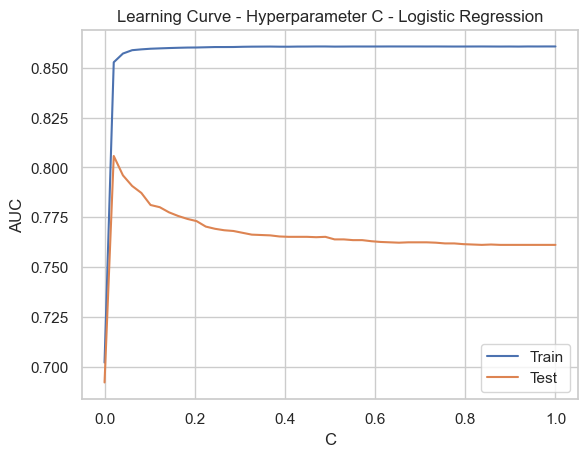

In [55]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #i will do this algorithm later
from sklearn.tree import DecisionTreeClassifier #i will do this algorithm later

def draw_learning_curve(param_values):
    train_scores=[]
    test_scores=[]
    
    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_trainPrePro, y_train_resampled)
        
        yPredTrainProba = model.predict_proba(X_trainPrePro)
        train_auc = roc_auc_score(y_train_resampled, yPredTrainProba[:,1])
        train_scores.append(train_auc)
        
        yPredProba = model.predict_proba(X_testPrePro)
        test_auc = roc_auc_score(y_test, yPredProba[:,1])
        test_scores.append(test_auc)
        
        print('param values: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()
    
param_values=[float(x)for x in np.linspace(0.0001, 1, 50)]
draw_learning_curve(param_values)

param values: 0.0001; train: 0.7019856841686307; test: 0.6920110192837465
param values: 0.0002555555555555556; train: 0.7152194327149707; test: 0.7057851239669422
param values: 0.0004111111111111111; train: 0.7261024496116317; test: 0.7175390266299356
param values: 0.0005666666666666667; train: 0.7357354742818764; test: 0.7258034894398531
param values: 0.0007222222222222223; train: 0.743956816188954; test: 0.7322314049586777
param values: 0.0008777777777777779; train: 0.7516433355513958; test: 0.738475665748393
param values: 0.0010333333333333334; train: 0.758210458890181; test: 0.7432506887052341
param values: 0.001188888888888889; train: 0.764286291751917; test: 0.7504132231404959
param values: 0.0013444444444444445; train: 0.7696593926654686; test: 0.7546372819100092
param values: 0.0015; train: 0.7742924484300471; test: 0.7581267217630854


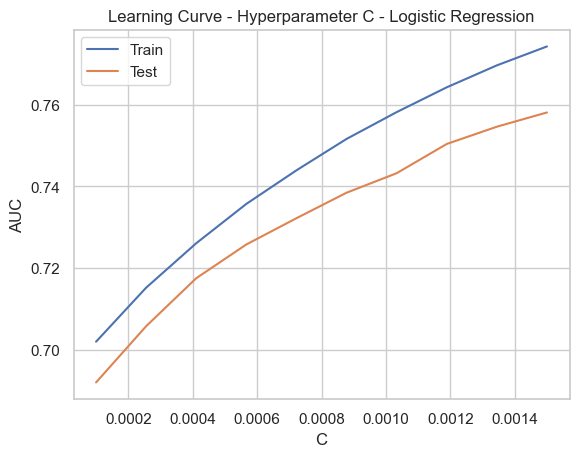

In [56]:
param_values=[float(x)for x in np.linspace(0.0001, 0.0015, 10)]
draw_learning_curve(param_values)

In [62]:
penalty = ['l2']
C = [float(x)for x in np.linspace(0.0001, 0.0015, 10)]
hyperparameters = dict(penalty=penalty, C=C)
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rs = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=5)
rs.fit(X_trainPrePro, y_train_resampled)
classification_evaluation(rs)

Accuracy (test): 68.18%
Accuracy (train): 67.71%
Precision (test): 53.95%
Precision (train): 69.29%
Recall (test): 74.55%
Recall (train): 63.59%
F1 Score (test): 62.60%
F1 Score (train): 66.32%
AUC (test-proba): 75.46%
AUC (train-proba): 76.97%
roc_auc (crosvall train): 83.05%
roc_auc (crosvall test): 83.23%
Confusion Matrix (test):
 [[64 35]
 [14 41]]
Confusion Matrix (train):
 [[288 113]
 [146 255]]


## kNN ##

In [89]:
knn = KNeighborsClassifier()
knn.fit(X_trainPrePro, y_train_resampled)

KNeighborsClassifier()

In [90]:
classification_evaluation(knn)

Accuracy (test): 62.99%
Accuracy (train): 83.42%
Precision (test): 48.84%
Precision (train): 80.18%
Recall (test): 76.36%
Recall (train): 88.78%
F1 Score (test): 59.57%
F1 Score (train): 84.26%
AUC (test-proba): 74.10%
AUC (train-proba): 93.12%
roc_auc (crosvall train): 87.19%
roc_auc (crosvall test): 74.68%
Confusion Matrix (test):
 [[55 44]
 [13 42]]
Confusion Matrix (train):
 [[313  88]
 [ 45 356]]


### Tuning hyperparameter kNN ###

In [67]:
n_neighbors=[int(x) for x in np.linspace(1, 100, 50)]
weights=['uniform', 'distance'] #check on scikit learn documentation
p=[1,2,3]

hyperparameters=dict(n_neighbors=n_neighbors, weights=weights, p=p)

knn.fit(X_train_resampled, y_train_resampled)
rskNN = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rskNN.fit(X_trainPrePro, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29, 31, 33, 35, 37,
                                                        39, 41, 43, 45, 47, 49,
                                                        51, 53, 55, 57, 59, ...],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='roc_auc')

In [83]:
classification_evaluation(rskNN)

Accuracy (test): 63.64%
Accuracy (train): 100.00%
Precision (test): 49.32%
Precision (train): 100.00%
Recall (test): 65.45%
Recall (train): 100.00%
F1 Score (test): 56.25%
F1 Score (train): 100.00%
AUC (test-proba): 73.74%
AUC (train-proba): 100.00%
roc_auc (crosvall train): 81.66%
roc_auc (crosvall test): 81.33%
Confusion Matrix (test):
 [[62 37]
 [19 36]]
Confusion Matrix (train):
 [[401   0]
 [  0 401]]


### Analyzing Learning Curve for kNN ###

param values: 1; train: 1.0; test: 0.685858585858586
param values: 56; train: 0.8288505668497086; test: 0.7668503213957759
param values: 111; train: 0.8029676432360495; test: 0.763820018365473
param values: 167; train: 0.7780828477434842; test: 0.7419651056014692
param values: 222; train: 0.7628528429549568; test: 0.7319559228650138
param values: 278; train: 0.7580301117530365; test: 0.7251606978879706
param values: 333; train: 0.7439723633559492; test: 0.720752984389348
param values: 389; train: 0.7376229003550973; test: 0.7350780532598714
param values: 444; train: 0.7349767725325091; test: 0.7054178145087237
param values: 500; train: 0.7290501924739274; test: 0.717447199265381


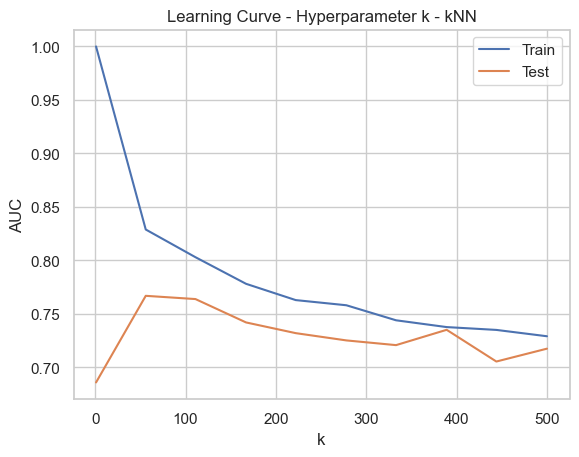

In [94]:
def draw_learning_curve(param_values):
    train_scores=[]
    test_scores=[]
    
    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_trainPrePro, y_train_resampled)
        
        yPredTrainProba = model.predict_proba(X_trainPrePro)
        train_auc = roc_auc_score(y_train_resampled, yPredTrainProba[:,1])
        train_scores.append(train_auc)
        
        yPredProba = model.predict_proba(X_testPrePro)
        test_auc = roc_auc_score(y_test, yPredProba[:,1])
        test_scores.append(test_auc)
        
        print('param values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter k - kNN')
    plt.legend()
    plt.show()
    
param_values=[int(x) for x in np.linspace(1, 500, 10)]
draw_learning_curve(param_values)

param values: 380; train: 0.7362609685263152; test: 0.7320477502295684
param values: 381; train: 0.7365377080988302; test: 0.734435261707989
param values: 382; train: 0.7365501458324264; test: 0.7345270890725435
param values: 383; train: 0.7379182965280067; test: 0.7347107438016529
param values: 384; train: 0.7379804851959877; test: 0.736455463728191
param values: 385; train: 0.7384935417068301; test: 0.7370982552800734
param values: 386; train: 0.7385930435755996; test: 0.7380165289256199
param values: 387; train: 0.738418915305253; test: 0.7375573921028467
param values: 388; train: 0.7381546134663342; test: 0.7356290174471992
param values: 390; train: 0.737933843695002; test: 0.7333333333333333


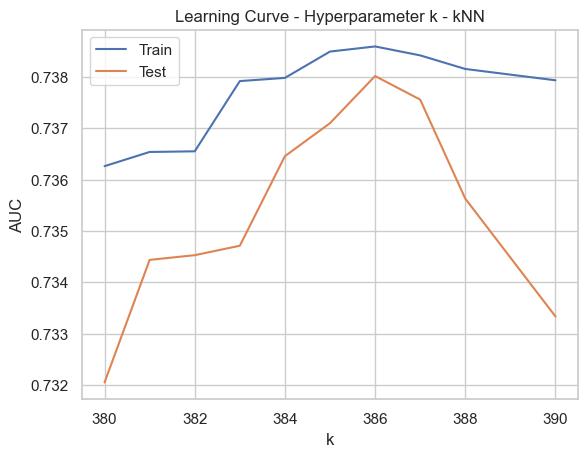

In [95]:
def draw_learning_curve(param_values):
    train_scores=[]
    test_scores=[]
    
    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_trainPrePro, y_train_resampled)
        
        yPredTrainProba = model.predict_proba(X_trainPrePro)
        train_auc = roc_auc_score(y_train_resampled, yPredTrainProba[:,1])
        train_scores.append(train_auc)
        
        yPredProba = model.predict_proba(X_testPrePro)
        test_auc = roc_auc_score(y_test, yPredProba[:,1])
        test_scores.append(test_auc)
        
        print('param values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter k - kNN')
    plt.legend()
    plt.show()
    
param_values=[int(x) for x in np.linspace(380, 390, 10)]
draw_learning_curve(param_values)

In [96]:
n_neighbors=[int(x) for x in np.linspace(380, 390, 10)]

weights=['uniform', 'distance']
p=[1,2,3]

hyperparameters=dict(n_neighbors=n_neighbors, weights=weights, p=p)

knn.fit(X_train_resampled, y_train_resampled)
rskNN = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rskNN.fit(X_trainPrePro, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [380, 381, 382, 383, 384,
                                                        385, 386, 387, 388,
                                                        390],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='roc_auc')

In [97]:
classification_evaluation(rskNN)

Accuracy (test): 63.64%
Accuracy (train): 100.00%
Precision (test): 49.32%
Precision (train): 100.00%
Recall (test): 65.45%
Recall (train): 100.00%
F1 Score (test): 56.25%
F1 Score (train): 100.00%
AUC (test-proba): 73.74%
AUC (train-proba): 100.00%
roc_auc (crosvall train): 81.66%
roc_auc (crosvall test): 81.33%
Confusion Matrix (test):
 [[62 37]
 [19 36]]
Confusion Matrix (train):
 [[401   0]
 [  0 401]]


## Decision Tree ##

In [98]:
dt = DecisionTreeClassifier()
dt.fit(X_trainPrePro, y_train_resampled)

DecisionTreeClassifier()

In [99]:
classification_evaluation(dt)

Accuracy (test): 66.23%
Accuracy (train): 100.00%
Precision (test): 52.05%
Precision (train): 100.00%
Recall (test): 69.09%
Recall (train): 100.00%
F1 Score (test): 59.38%
F1 Score (train): 100.00%
AUC (test-proba): 66.87%
AUC (train-proba): 100.00%
roc_auc (crosvall train): 100.00%
roc_auc (crosvall test): 68.78%
Confusion Matrix (test):
 [[64 35]
 [17 38]]
Confusion Matrix (train):
 [[401   0]
 [  0 401]]


### Tuning Hyperparameter Decision Tree ###

In [102]:
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV

param values: 1; train: 0.7119700748129676; test: 0.7494949494949494
param values: 1; train: 0.7119700748129676; test: 0.7494949494949494
param values: 1; train: 0.7119700748129676; test: 0.7494949494949494
param values: 1; train: 0.7119700748129676; test: 0.7494949494949494
param values: 1; train: 0.7119700748129676; test: 0.7494949494949494
param values: 2; train: 0.8016119302740655; test: 0.7562901744719925
param values: 2; train: 0.8016119302740655; test: 0.7562901744719925
param values: 2; train: 0.8016119302740655; test: 0.7562901744719925
param values: 2; train: 0.8016119302740655; test: 0.7562901744719925
param values: 3; train: 0.853051286994484; test: 0.8041322314049586


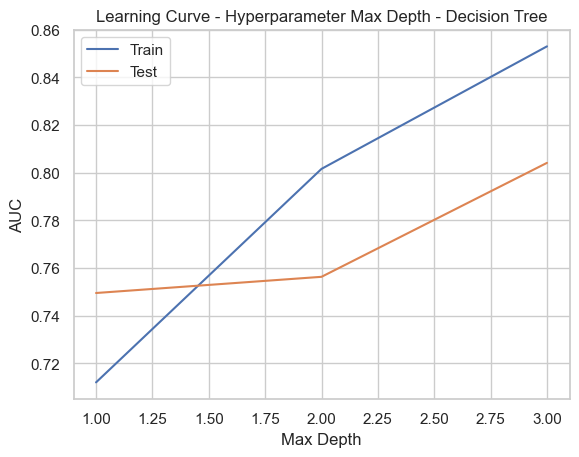

In [140]:
def draw_learning_curve(param_values):
    train_scores=[]
    test_scores=[]
    
    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_trainPrePro, y_train_resampled)
        
        yPredTrainProba = model.predict_proba(X_trainPrePro)
        train_auc = roc_auc_score(y_train_resampled, yPredTrainProba[:,1])
        train_scores.append(train_auc)
        
        yPredProba = model.predict_proba(X_testPrePro)
        test_auc = roc_auc_score(y_test, yPredProba[:,1])
        test_scores.append(test_auc)
        
        print('param values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Max Depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Max Depth - Decision Tree')
    plt.legend()
    plt.show()
    
param_values=[int(x) for x in np.linspace(1, 10, 10)]
draw_learning_curve(param_values)

param values: 50; train: 0.8651967338511576; test: 0.8004591368227731
param values: 87; train: 0.8274730878539311; test: 0.7558310376492196
param values: 125; train: 0.7964751462988415; test: 0.797979797979798
param values: 163; train: 0.7964751462988415; test: 0.797979797979798
param values: 201; train: 0.7710928414624288; test: 0.7640955004591368
param values: 238; train: 0.7119700748129676; test: 0.7494949494949494
param values: 276; train: 0.7119700748129676; test: 0.7494949494949494
param values: 314; train: 0.7119700748129676; test: 0.7494949494949494
param values: 352; train: 0.7094763092269327; test: 0.7212121212121213
param values: 390; train: 0.7094763092269327; test: 0.7434343434343434


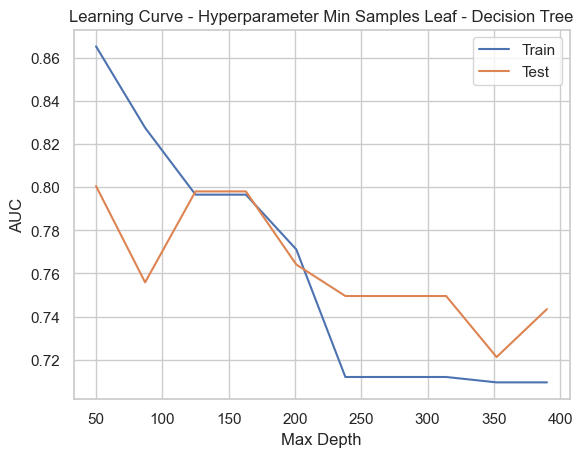

In [141]:
def draw_learning_curve(param_values):
    train_scores=[]
    test_scores=[]
    
    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(X_trainPrePro, y_train_resampled)
        
        yPredTrainProba = model.predict_proba(X_trainPrePro)
        train_auc = roc_auc_score(y_train_resampled, yPredTrainProba[:,1])
        train_scores.append(train_auc)
        
        yPredProba = model.predict_proba(X_testPrePro)
        test_auc = roc_auc_score(y_test, yPredProba[:,1])
        test_scores.append(test_auc)
        
        print('param values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Max Depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Min Samples Leaf - Decision Tree')
    plt.legend()
    plt.show()
    
param_values=[int(x) for x in np.linspace(50, 390, 10)]
draw_learning_curve(param_values)

In [178]:
from scipy.stats import randint

parameters = {
    'max_depth': randint(1, 11),
    'min_samples_split': randint(2, 101),
    'min_samples_leaf': randint(1, 51),
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)

dtTuning = RandomizedSearchCV(dt, param_distributions=parameters, n_iter=10, cv=5, scoring='precision', random_state=42)
dtTuning.fit(X_trainPrePro, y_train_resampled)

classification_evaluation(dtTuning)
#i use randomized search instead of grid due to the lackness of the resources

Accuracy (test): 66.88%
Accuracy (train): 79.18%
Precision (test): 52.08%
Precision (train): 77.73%
Recall (test): 90.91%
Recall (train): 81.80%
F1 Score (test): 66.23%
F1 Score (train): 79.71%
AUC (test-proba): 78.09%
AUC (train-proba): 87.03%


/Users/christoforusvenus/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christoforusvenus/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christoforusvenus/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christoforusvenus/opt/anaconda3/lib/pyt

roc_auc (crosvall train): 67.60%
roc_auc (crosvall test): 63.15%
Confusion Matrix (test):
 [[53 46]
 [ 5 50]]
Confusion Matrix (train):
 [[307  94]
 [ 73 328]]


## Feature Importance ##

In [179]:
def show_feature_importance(model):
    feat_importance = pd.Series(model.feature_importances_, index=X_trainPrePro.columns)
    ax = feat_importance.nlargest(25).plot(kind='barh', figsize=(10,8))
    ax.invert_yaxis()
    
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('Feature Importance Score')

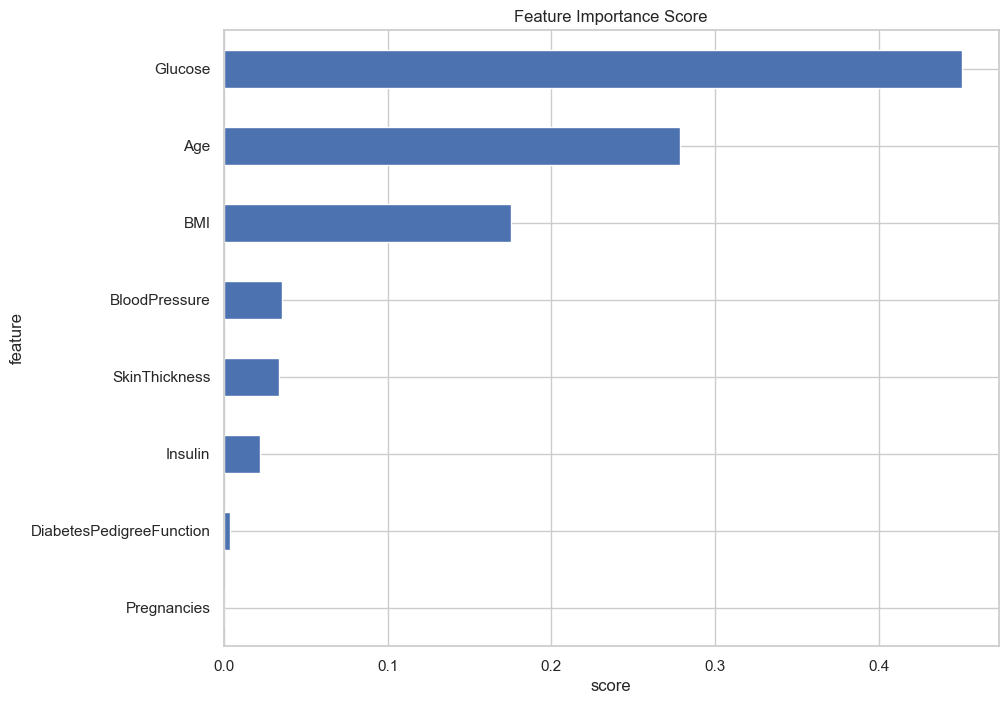

In [180]:
show_feature_importance(dtTuning.best_estimator_)